#### Polynomial regression

#### We will be using Auto MPG data from UCI datasets (https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to study polynomial regression.

In [10]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("auto-mpg.data", header=None, delimiter=r"\s+", names=columns) 
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# fix data types
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
# remove null or undefined values
df = df.dropna()
# drop the column car_name
df = df.drop('car_name', axis=1)
# print the info of the cleaned data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB
None


In [13]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd

# separate target variable from features
X = df.drop('mpg', axis=1)
y = df['mpg']

for col in X.columns:
    # create a DataFrame with the predictor variable and target variable
    df_train = pd.concat([X[col], y], axis=1)

    # fit a simple linear regression model with the current feature as predictor
    model = smf.ols(f'mpg ~ {col}', data=df_train).fit()

    # print the R-squared value
    print(f'R-squared for {col}: {model.rsquared:.2f}')
    


R-squared for cylinders: 0.60
R-squared for displacement: 0.65
R-squared for horsepower: 0.61
R-squared for weight: 0.69
R-squared for acceleration: 0.18
R-squared for model_year: 0.34
R-squared for origin: 0.32


In [14]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import pandas as pd


# separate target variable from features
X = df.drop('mpg', axis=1)
y = df['mpg']

# # split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import statsmodels.formula.api as smf
import numpy as np

# create a DataFrame with the predictor variable and target variable
df_train = pd.concat([X['weight'], y], axis=1)

# define the maximum degree of polynomial regression
max_degree = 10

# initialize a dictionary to store the R-squared values for each degree
r_squared = {}

# fit polynomial regression models with degrees up to max_degree
for degree in range(1, max_degree+1):
    # add polynomial terms up to the current degree
    formula = 'mpg ~ '
    for i in range(1, degree+1):
        formula += f'np.power(weight, {i}) + '
    formula = formula[:-3]  # remove the last '+'

    # fit the polynomial regression model
    print(formula)
    model = smf.ols(formula=formula, data=df_train).fit()
    

    # store the R-squared value
    r_squared[degree] = model.rsquared

# print the R-squared values for each degree
for degree, r2 in r_squared.items():
    print(f"Degree {degree}: R-squared = {r2:.10f}")

# find the degree with the highest R-squared value
best_degree = max(r_squared, key=r_squared.get)
print(f"\nBest degree: {best_degree} (R-squared = {r_squared[best_degree]:.5f})")

mpg ~ np.power(weight, 1)
mpg ~ np.power(weight, 1) + np.power(weight, 2)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4) + np.power(weight, 5)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4) + np.power(weight, 5) + np.power(weight, 6)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4) + np.power(weight, 5) + np.power(weight, 6) + np.power(weight, 7)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4) + np.power(weight, 5) + np.power(weight, 6) + np.power(weight, 7) + np.power(weight, 8)
mpg ~ np.power(weight, 1) + np.power(weight, 2) + np.power(weight, 3) + np.power(weight, 4) + np.power(weight, 5) + np.power(weight, 6) + np.power(weight, 7) + np.power(weight,

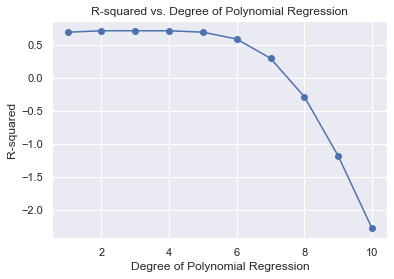

In [9]:
import matplotlib.pyplot as plt

# Define the x and y values for the plot
x = list(r_squared.keys())
y = list(r_squared.values())

# Plot the R-squared values
plt.plot(x, y, marker='o')
plt.xlabel('Degree of Polynomial Regression')
plt.ylabel('R-squared')
plt.title('R-squared vs. Degree of Polynomial Regression')
plt.show()